# Homework 4 Solution

### Due: Sat Dec. 8 @ 9pm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

%matplotlib inline
np.random.seed(123)

Homework 4 is composed of two parts.

In Part 1, we will see an example of using PCA to plot a high dimensional dataset in 2D. We will then perform K-Means clustering on the dataset and plot using the same PCA representation to see how clustered our data is in the original 64D space.

In Part 2 we will generate recommendations on products from a department store based on product descriptions.  
We'll first transform the data into topics using Latent Dirichlet Approximation, and then generate recommendations based on this new representation.

# Part 1 : PCA and K-Means

## Use PCA to plot the digits dataset in 2D

The digits dataset is composed of a set of images of handwritten digits 0 to 9.
There are 1797 images, each 32x32 pixels.
If we flatten out each image we get a dataset of 1797 observations, each with 64 features, each belonging to one of 10 classes.
We can't plot them in 64 dimensional space, so we will use PCA to reduce the dimensionality to 2.
Hopefully the data will still be clustered by class.

In [2]:
# DO NOT CHANGE

# first we'll load the data
from sklearn.datasets import load_digits
digits = load_digits()
X_digits = digits['data']   # grab the digits data (each image a vector, no need to reshape)
y_digits = digits['target'] # grab the labels from the digits dataset

# show the shape of the dataset (rows,columns)
X_digits.shape

(1797, 64)

In [3]:
# using PCA from sklearn.decomposition
from sklearn.decomposition import PCA

In [4]:
# create a pca object that will result in 2 components being returned
#  use random_state=123
pca = PCA(n_components=2, random_state=123)

In [5]:
# do a fit_transform on X_digits to get our new X_2D
# print the shape of the new X_2d: should be (1797,2)
X_2D = pca.fit_transform(X_digits)

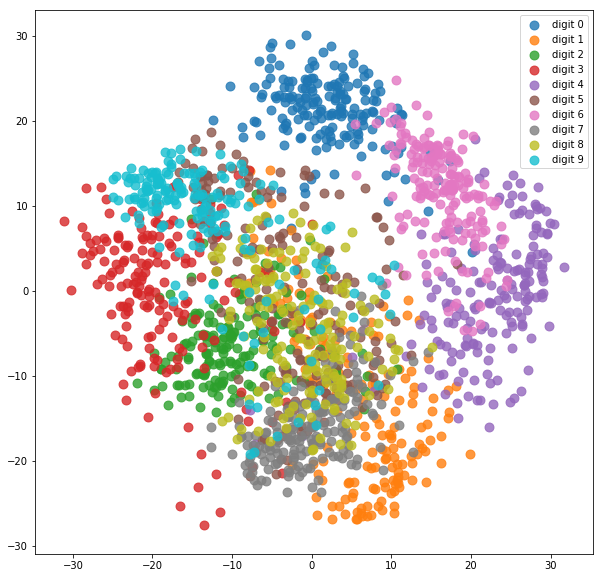

In [6]:
# Since we have the labels, we can plot each class separately using our X_2D dataset
# for each label (0 to 9), create a scatter plot on the same figure
#   use s=80 (size), alpha=0.8 (too make markers transparent), label='digit '+str(i) (for legend)
# we should see that 0 and 1 are far apart, as well as 3 and 4
fig = plt.figure(figsize=(10,10))
for i in range(10):
    X_subset = X_2D[y_digits == i]
    plt.scatter(X_subset[:,0],X_subset[:,1],s=80,alpha=.8,label='digit '+str(i))
_ = plt.legend()

## K-Means Clustering

How clustered are our classes? Can k-Means find clusters in the 2D PCA transformed data that at all correspond to the plot seen above?

In [7]:
# using KMeans from sklearn.cluster
from sklearn.cluster import KMeans

In [8]:
# create a KMeans object which will generate 10 clusters
#  use random_state=123
km = KMeans(n_clusters=10, random_state=123)

In [9]:
# use fit_predict() to both fit our k-means model and generate cluster assignments 
#   on our X_2D dataset with 2 features
# show the first 10 cluster assignments
# note: cluster assignment values will be from 0 to 9
cluster_assignments = km.fit_predict(X_2D)
cluster_assignments[:10]

array([5, 0, 9, 4, 7, 8, 7, 3, 1, 1], dtype=int32)

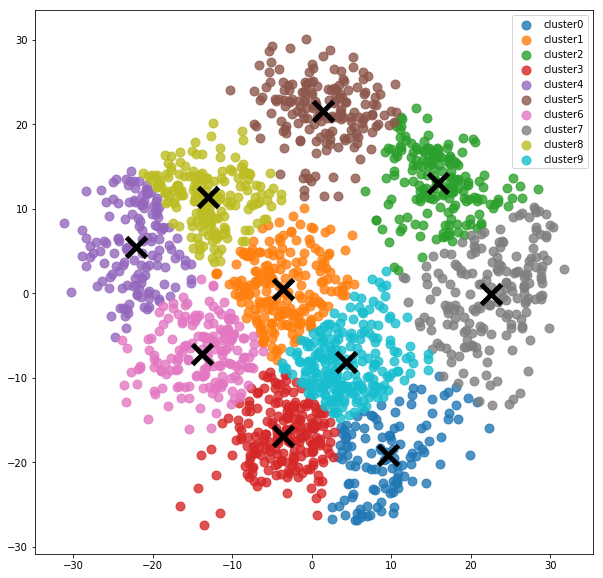

In [10]:
# Here, we ignore our y_digit labels.
# Create the same plot as we did above, again using the X_2D data,
#   but this time one plot per cluster
#   useing s=80 (size), alpha=0.8, label='cluster '+str(i)
# We're also plotting the cluster centers as X's.
# NOTE: Note that the cluster assignments should look very similar to the class assignments in the plot above, 
#   meaning that the data is highly clustered even in this 2D space.
# Also note that the colors may be different from the plot above, since there is no ordering to the clusters
fig = plt.figure(figsize=(10,10))
for i in range(10):
    X_subset = X_2D[cluster_assignments == i]
    plt.scatter(X_subset[:,0],X_subset[:,1],s=80,alpha=.8,label='cluster'+str(i));
    plt.plot(km.cluster_centers_[i][0],km.cluster_centers_[i][1],marker='x',c='k', ms=20, mew=5, label=None);
plt.legend();

# Part 2 : LDA and Recommendation Engine

## Transform product descriptions into topics and print sample terms from topics

We are going to create a recommendation engine for products from a department store.  
The recommendations will be based on the similarity of product descriptions.  
We'll query a product and get back a list of products that are similar.  
Instead of using the descriptions directly, we will first do some topic modeling using LDA to transform the descriptions into a topic space.

In [11]:
# DO NOT CHANGE

# import libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

warnings.simplefilter(action='ignore', category=DeprecationWarning)

# load product information
df_products = pd.read_csv('../data/jcpenney-products_subset.zip',index_col=0)

# get product descriptions as our dataset
X_products = df_products.description

# show the number of rows in the dataset
len(X_products)

5000

In [12]:
# instantiate a TfIdfVectorizer with
#   min_df=5, stop_words='english'
tfidf = TfidfVectorizer(min_df=5,stop_words='english')

In [13]:
# fit_transform tfidf on X, creating the transformed dataset X_tfidf
# show the shape of the new dataset
# NOTE: this step may take a minute or so
X_tfidf = tfidf.fit_transform(X_products)
X_tfidf.shape

(5000, 4052)

In [14]:
# get the feature names from cv using get_feature_names()
# print the first 10 and last 10 features
feature_names = tfidf.get_feature_names()
print(feature_names[:10])
print(feature_names[-10:])

['000', '01', '05', '08', '10', '100', '1000', '100m', '100w', '104x90']
['zigzag', 'zinc', 'zip', 'zipper', 'zippered', 'zippers', 'zirconia', 'zone', 'zones', 'zoo']


In [15]:
# instantiate a LatentDirichletAllocation model with
#  n_components=20, n_jobs=-1, random_state=123
lda = LatentDirichletAllocation(n_components=20,n_jobs=-1,random_state=123)

In [16]:
# fit_transform lda on X_tfidf, creating a newly transformed dataset X_lda
# show the shape of the new dataset
# NOTE: this step may take a minute or more, but no more than 5
X_lda = lda.fit_transform(X_tfidf)
X_lda.shape

(5000, 20)

In [17]:
X_lda[500]

array([0.00770345, 0.00770345, 0.00770345, 0.00770345, 0.00770345,
       0.00770345, 0.85363447, 0.00770345, 0.00770345, 0.00770345,
       0.00770345, 0.00770345, 0.00770345, 0.00770345, 0.00770345,
       0.00770345, 0.00770345, 0.00770345, 0.00770345, 0.00770345])

In [18]:
# DO NOT CHANGE
# a utility function to print out the terms that are highly likely for each topic
# taken from https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)

In [19]:
# use print_top_words to print the top 10 words for each topic
print_top_words(lda,feature_names,10)

Topic #0: sleepwear meet gown safety flame important snug requirements children consumer
Topic #1: group aldo garment spring hipster brand batman lineup sunshine child
Topic #2: rug resistant yes backing indoor pad recommended fade stain slip
Topic #3: wicking moisture dri quick chafe fabric seams compression workouts workout
Topic #4: hair salon towel towels item month customer products limits purchases
Topic #5: bra straps manufacturer cups nylon underwire support seamless line smooth
Topic #6: cotton washable imported polyester spandex fit pockets length sleeves look
Topic #7: carter 26¾ rhinestones hazard warning choking parts ages awesome children
Topic #8: garment likely catch snugly adventures pajama bottoms friends child flame
Topic #9: short chevron layered chic sure pattern 25 shirt sleeve favorite
Topic #10: stafford tagless sewn lay stays resist shirttail puckering collar broadcloth
Topic #11: king comforter shams queen twin decorative pillow blanket set spot
Topic #12: jun

### Generate recommendations using topics

In [20]:
# we'll use cosine_similarity to generate our recommendations
from sklearn.metrics.pairwise import cosine_similarity

In [21]:
# use cosine_similarity to generate our similarity scores on our X_lda data
# show the shape of the similarities matrix
# NOTE: we only need to pass X_lda in once,
#  the function will calculate pairwise similarity for all elements in that matrix
similarities = cosine_similarity(X_lda)
similarities.shape

(5000, 5000)

In [22]:
# DO NOT CHANGE

# we'll get the recommendations for products similar to the one at this index
query_idx = 500

In [23]:
# show the product name (name_title) for the item at query_idx
# NOTE: you need to get this from df_products, perhaps using iloc
df_products.iloc[query_idx].name_title

'2 CT. T.W. Diamond 14K White Gold 3-Stone Engagement Ring'

In [24]:
# get the similarity scores for our query_idx
# NOTE: these will be from the query_idx row of similarities
query_scores = similarities[query_idx]

In [25]:
# we want to get the indices of our products, sorted by the query_scores
# we can do this using np.argsort() which instead of returning a sorted array,
#   returns the sorted indices of the array, sorted in ascending value
#   eg: x = [0.5,0.7,0.2] => np.argsort(x) = [2,0,1]
# show the last 10 values from best_sorted_asc
best_sorted_asc = np.argsort(query_scores)
best_sorted_asc[-10:]

array([ 312, 4931, 3188,  618,  524,  507, 2137, 1812,  806,  500])

In [26]:
# since our best similarity scores are our highest scores, we need to reverse the order
# for an np.array() tmp we do this by tmp[::-1]
#  eg: x = [1,2,3] => x[::-1] = [3,2,1]
# show the first 10 scores of best_sorted_desc (it should be the reverse of the above)
best_sorted_desc = best_sorted_asc[::-1]
best_sorted_desc[:10]

array([ 500,  806, 1812, 2137,  507,  524,  618, 3188, 4931,  312])

In [27]:
# print out the the product name for the top 10 recommendations
# to do this, for each index in the first 10 elements of best_sorted_desc,
#   print the associated df_products.name_title
# NOTE: some of these should make sense, some will not
#   need to do a little more processing before we deploy...
for idx in best_sorted_desc[:10]:
    print(df_products.name_title[idx])

2 CT. T.W. Diamond 14K White Gold 3-Stone Engagement Ring
IN Love 1 CT. T.W. Princess-Cut Diamond 14K White Gold Band
Armitron® Mens Gold-Tone Bracelet Watch
Diamond Promise Ring 1/7 CT. T.W. 14K/Silver
Lee® Carpenter Jeans–Big & Tall
Collection by Michael Strahan Cotton Stretch Dress Shirt with French Cuffs
Lee® Carpenter Jeans
Carter's® Boy 3-pc. Vest Set - Baby Boys newborn-24m
Worthington® Bermuda Shorts
The Foundry Supply Co.™ Belted Cargo Shorts – Big & Tall
